In [1]:
from application.keras_inception_resnet_v2_se import KerasInceptionResNetV2SEBlock

model = KerasInceptionResNetV2SEBlock()

2022-02-10 15:38:03.963929: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-10 15:38:03.964043: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



In [2]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [2]:
from application.inception import stem, block35, reduction_A, block17, reduction_B, block8
from tensorflow import keras
from application.FILTERS import InceptionResNetV2_Filters

img_input = keras.layers.Input(shape=[299, 299, 3])
filters = InceptionResNetV2_Filters()
a = stem(img_input, filters.STEM)
a = block35(a, filters.BLOCK35)
a = reduction_A(a, filters.REDUCTION_A)
a = block17(a, filters.BLOCK17)
a = reduction_B(a, filters.REDUCTION_B)
a = block8(a, filters.BLOCK8)
keras.models.Model(inputs=[img_input], outputs=[a]).summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_32 (BatchNo (None, 149, 149, 32) 96          conv2d_34[0][0]                  
__________________________________________________________________________________________________
activation_34 (Activation)      (None, 149, 149, 32) 0           batch_normalization_32[0][0]     
____________________________________________________________________________________________

In [1]:
from application.small_keras_inception_resnet_v2 import SmallKerasInceptionResNetV2

model = SmallKerasInceptionResNetV2()
model.summary()


2022-02-22 15:36:16.459946: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-22 15:36:16.460328: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
____________

In [1]:
from application.keras_inception_resnet_v2_se import KerasInceptionResNetV2SEBlock

model = KerasInceptionResNetV2SEBlock()
model.summary()

2022-02-10 18:57:51.308442: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-02-10 18:57:51.308618: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
____________

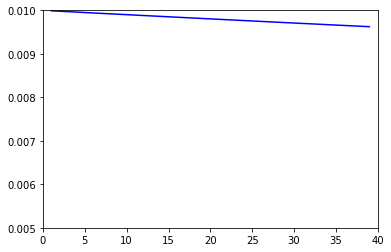

In [6]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 100)
decay = 0.001
lr = 0.01
y = 1 / (1 + (decay * x))
plt.axis([0,40, 0.005,0.01])
plt.plot(x, lr*y, 'b-')
plt.show()

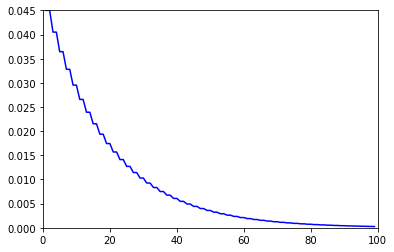

In [14]:
x = np.arange(1, 100)
decay = 0.9
lr = 0.045
y = []
for i in x:
    if i % 2 == 1 and i != 1:
        lr = lr * decay
        y.append(lr)
    else:
        y.append(lr)
y = np.array(y)
plt.axis([0,100, 0,0.045])
plt.plot(x, y, 'b-')
plt.show()

In [1]:
dictionary_data = {
        'optimizer' : {
            'name' : 'RMSProp',
            'lr_decay': 0.94,
            'kwargs' : {
                'learning_rate' : 0.045,
                'rho' : 0.9,
                'epsilon' : 1.0,
                }
        },
        'batch': 32,
        'crop' : 'random',
    }
    

import pickle

a_file = open("data.pkl", "wb")
pickle.dump(dictionary_data, a_file)
a_file.close()

a_file = open("data.pkl", "rb")
output = pickle.load(a_file)